In [ ]:
import pandas as pd
import numpy as np

import re
import string
import os
import  tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

plt.style.use('ggplot')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam


In [ ]:
url = 'https://raw.githubusercontent.com/laxmimerit/twitter-disaster-prediction-dataset/master/train.csv'
tweet = pd.read_csv(url)

In [ ]:
tweet.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
tweet.shape

(7613, 5)

In [ ]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
#target class distribution
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 60

Text(0.5, 1.0, 'Real or Not Real Tweet')

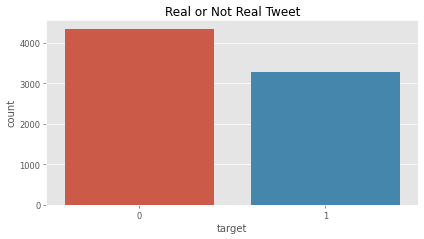

In [ ]:
sns.countplot(x='target', y=None, data=tweet)
plt.title('Real or Not Real Tweet')

In [ ]:
tweet['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

<Axes: ylabel='target'>

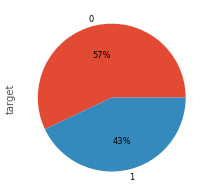

In [ ]:
tweet['target'].value_counts().plot.pie(autopct='%1.0f%%')

In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-ve73hqqg
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-ve73hqqg
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7602 sha256=b954a548f7ed3d93570f0dcb1b7facead983eaa893580623c21d748cfb2fcbba
  Stored in directory: /tmp/pip-ephem-wheel-cache-28_f_jmm/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as kgp

In [ ]:
kgp.get_basic_features(tweet)

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,73,11,6.636364,2,0,0,2,0
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,106,20,5.300000,9,0,2,2,0
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,58,8,7.250000,1,0,0,7,2
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,119,19,6.263158,6,0,0,2,0


<ipython-input-13-72f162dc66a6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tweet['char_counts'])


<Axes: xlabel='char_counts', ylabel='Density'>

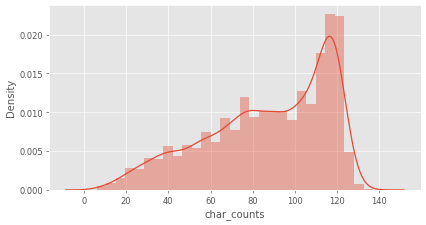

In [ ]:
sns.distplot(tweet['char_counts'])

<Axes: xlabel='char_counts', ylabel='Density'>

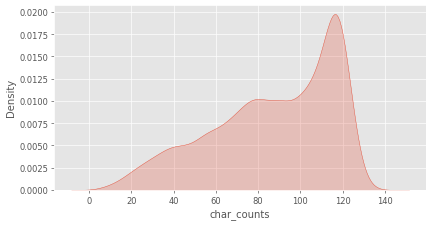

In [ ]:
sns.kdeplot(tweet['char_counts'], fill=True)

<Axes: xlabel='char_counts', ylabel='Density'>

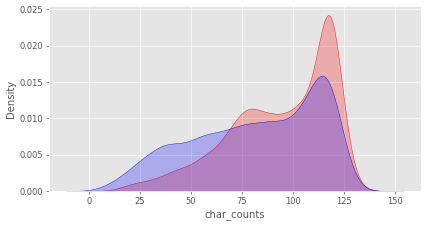

In [ ]:
sns.kdeplot(tweet[tweet['target']==1]['char_counts'], fill=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['char_counts'], fill=True, color='blue')

<Axes: xlabel='word_counts', ylabel='Density'>

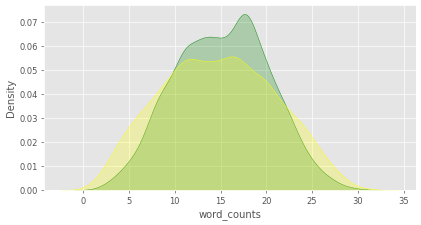

In [ ]:
sns.kdeplot(tweet[tweet['target']==1]['word_counts'], fill=True, color='green')
sns.kdeplot(tweet[tweet['target']==0]['word_counts'], fill=True, color='yellow')

<Axes: xlabel='avg_wordlength', ylabel='Density'>

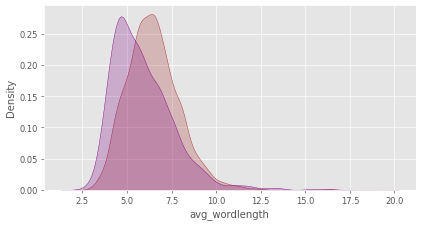

In [ ]:
sns.kdeplot(tweet[tweet['target']==1]['avg_wordlength'], fill=True, color='brown')
sns.kdeplot(tweet[tweet['target']==0]['avg_wordlength'], fill=True, color='purple')

<Axes: xlabel='stopwords_counts', ylabel='Density'>

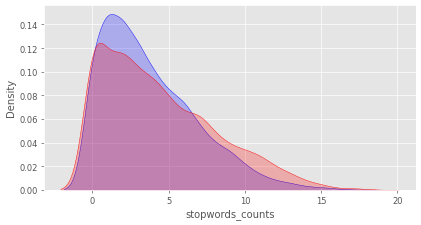

In [ ]:
sns.kdeplot(tweet[tweet['target']==1]['stopwords_counts'], fill=True, color='blue')
sns.kdeplot(tweet[tweet['target']==0]['stopwords_counts'], fill=True, color='red')

In [ ]:
tweet.head(2)

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0


<Axes: xlabel='word_counts', ylabel='Density'>

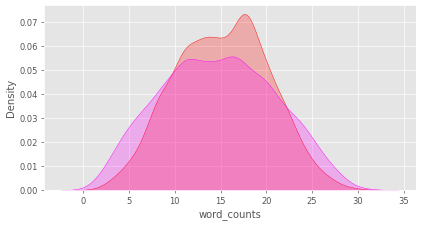

In [ ]:
sns.kdeplot(tweet[tweet['target']==1]['word_counts'], fill=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['word_counts'], fill=True, color='magenta')

<Axes: xlabel='avg_wordlength', ylabel='Density'>

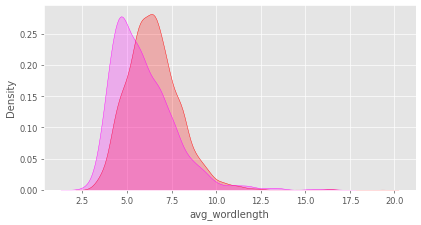

In [ ]:
sns.kdeplot(tweet[tweet['target']==1]['avg_wordlength'], fill=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['avg_wordlength'], fill=True, color='magenta')

<Axes: xlabel='stopwords_counts', ylabel='Density'>

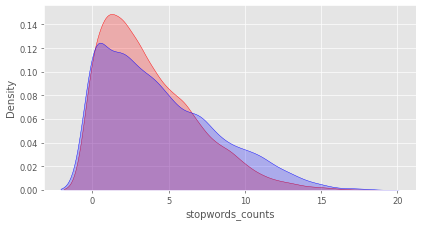

In [ ]:
sns.kdeplot(tweet[tweet['target']==1]['stopwords_counts'], fill=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['stopwords_counts'], fill=True, color='blue')

In [ ]:
f = kgp.get_word_freqs(tweet, 'text')
print(f)

the                        2575
a                          1845
to                         1805
in                         1757
of                         1722
                           ... 
https://t.co/NlJVP3Vfyz       1
(Ft.                          1
Dix                           1
bandolier                     1
http://t.co/YmY4rSkQ3d        1
Length: 31924, dtype: int64


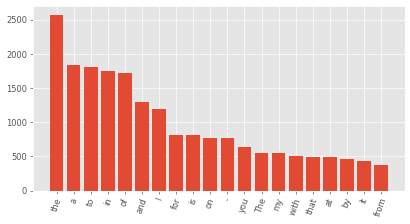

In [ ]:
r = f[:20]
plt.bar(r.index, r.values)
plt.xticks(rotation=70)
plt.show()

In [ ]:
l = f[-20:]
print(l)

http://t.co/JD7rIK7fX0     1
ft.åÊM.O.P.                1
http://t.co/ZDTz3RbS6w     1
'Detonate.'                1
@ApolloBrown's             1
PLAY                       1
missed.                    1
detonate&amp;Shots         1
succeed                    1
marines                    1
@BBCTalkback               1
@rfcgeom66                 1
@tomfromireland            1
@SourMashNumber7           1
#FIYA!                     1
https://t.co/NlJVP3Vfyz    1
(Ft.                       1
Dix                        1
bandolier                  1
http://t.co/YmY4rSkQ3d     1
dtype: int64


In [ ]:
bigram = kgp.get_ngram(tweet, 'text', ngram_range=2)
print(bigram)

[('ûówe work', 68495), ('ûótech business', 68494), ('ûónegligence and', 68493), ('ûókody vine', 68492), ('ûóher upper', 68491), ('ûó wallybaiter', 68490), ('ûó the', 68489), ('ûó stories', 68488), ('ûó rt', 68487), ('ûó richmond', 68486), ('ûó organizers', 68485), ('ûó oh', 68484), ('ûó now', 68483), ('ûó lol', 68482), ('ûó integrates', 68481), ('ûó https', 68480), ('ûó hiroshima', 68479), ('ûó head', 68478), ('ûó eh', 68477), ('ûó desolation', 68476), ('ûó bulletproof', 68475), ('ûó britain', 68474), ('ûó bbc', 68473), ('ûó and', 68472), ('ûó an', 68471), ('ûòåêcnbc http', 68470), ('ûòthe united', 68469), ('ûò800000 fatalities', 68468), ('ûò ûïdetonate', 68467), ('ûò your', 68466), ('ûò vladimir', 68465), ('ûò video', 68464), ('ûò usa', 68463), ('ûò two', 68462), ('ûò those', 68461), ('ûò the', 68460), ('ûò steve', 68459), ('ûò skyåênews', 68458), ('ûò residents', 68457), ('ûò part', 68456), ('ûò news', 68455), ('ûò musicians', 68454), ('ûò more', 68453), ('ûò malaysian', 68452), ('ûò

In [ ]:
#data cleaning

def get_clean(x):
  x = str(x).lower().replace('\\', '').replace('_', '').replace('.', '')
  x = kgp.cont_exp(x)
  x = kgp.remove_emails(x)
  x = kgp.remove_urls(x)
  x = kgp.remove_rt(x)
  x = kgp.remove_accented_chars(x)
  x = kgp.remove_special_chars(x)
  x = kgp.remove_dups_char(x)
  return x

In [ ]:
tweet['text'] = tweet['text'].apply(lambda x: get_clean(x))

In [ ]:
tweet.head()['text']

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    130 people receive wildfires evacuation orders...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [ ]:
kgp.get_ngram(tweet, 'text', ngram_range=2)

[('zxathetis are', 64884),
 ('zurich for', 64883),
 ('zumiez is', 64882),
 ('zss vs', 64881),
 ('zourryart forgot', 64880),
 ('zouma just', 64879),
 ('zouma has', 64878),
 ('zotar50 skeleton', 64877),
 ('zoom in', 64876),
 ('zonewolf123 liked', 64875),
 ('zonesthank god', 64874),
 ('zones donuat', 64873),
 ('zone with', 64872),
 ('zone what', 64871),
 ('zone war', 64870),
 ('zone they', 64869),
 ('zone protectdenaliwolves', 64868),
 ('zone outside', 64867),
 ('zone of', 64866),
 ('zone my', 64865),
 ('zone littlewomenla', 64864),
 ('zone laugh', 64863),
 ('zone johnny', 64862),
 ('zone in', 64861),
 ('zone httptco6sdgz5dxnt', 64860),
 ('zone during', 64859),
 ('zone common', 64858),
 ('zone coming', 64857),
 ('zone but', 64856),
 ('zone and', 64855),
 ('zone amirite', 64854),
 ('zombies take', 64853),
 ('zombie fun', 64852),
 ('zombie feel', 64851),
 ('zombie apocalypse', 64850),
 ('zomatoaus lovefood', 64849),
 ('zojadelin you', 64848),
 ('zodiac girl', 64847),
 ('ziuw httptcoirt4kkgs

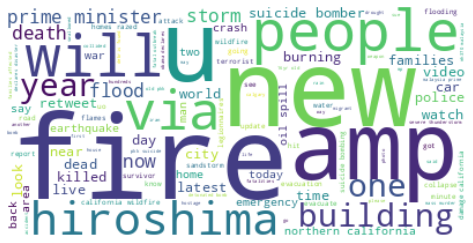

In [ ]:
#Disaster word visualization with WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text_data = ' '.join(tweet[tweet['target'] == 1]['text'].values)

wordcloud = WordCloud(max_font_size=100, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

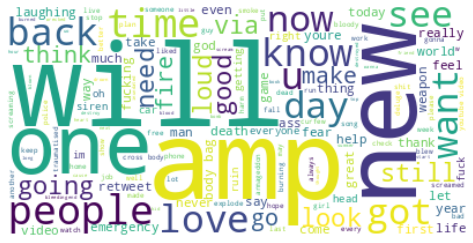

In [ ]:
#Disaster word visualization with WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text_data = ' '.join(tweet[tweet['target'] == 0]['text'].values)

wordcloud = WordCloud(max_font_size=100, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#classification with TfID and SVM
x = tweet['text']
y = tweet['target']

tfid = TfidfVectorizer()
model = tfid.fit_transform(x)

In [ ]:
print(x.shape, y.shape)

(7613,) (7613,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42, stratify=y)

In [ ]:
def run_SVM(clf, x_train, x_test, y_train, y_test):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)

  print()
  print('Classification Report')
  print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)


clf = LinearSVC()
clf.fit(x_train_tfidf, y_train)
y_pred = clf.predict(x_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7931713722915299
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       874
           1       0.77      0.73      0.75       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.79      1523
weighted avg       0.79      0.79      0.79      1523



In [ ]:
!python -m spacy download en_core_web_lg

2023-12-24 16:31:37.290969: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-24 16:31:37.291072: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-24 16:31:37.293333: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-24 16:31:40.032521: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy
import en_core_web_lg

In [ ]:
nlp = en_core_web_lg.load()

In [ ]:
x = 'cat dog'
doc = nlp(x)

In [ ]:
def get_vec(x):
  doc = nlp(x)
  vec = doc.vector
  return vec

In [ ]:
tweet['vec'] = tweet['text'].apply(lambda x: get_vec(x))

In [ ]:
tweet.head(2)

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,vec
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,57,13,4.384615,6,1,0,0,1,"[-0.8476947, 0.8888447, -3.10391, 0.090650745,..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,32,7,4.571429,0,0,0,1,0,"[-0.35491997, -1.5415528, -2.0926642, -0.49523..."


In [ ]:
r = tweet['vec'].to_numpy()
r = r.reshape(-1, 1)

In [ ]:
r

array([[array([-8.47694695e-01,  8.88844728e-01, -3.10390997e+00,  9.06507447e-02,
                3.90762043e+00,  1.46506298e+00, -6.57560766e-01,  2.51442313e+00,
               -1.69536412e+00, -5.39575517e-01,  7.39905834e+00,  5.55623353e-01,
               -4.93862724e+00,  8.05945456e-01,  1.53105545e+00, -1.96862876e-01,
                1.74314392e+00, -2.52266932e+00, -1.57163131e+00, -2.15600276e+00,
                1.15904152e+00, -1.69894052e+00, -2.70636702e+00, -1.65117764e+00,
               -1.83865383e-01,  1.01622748e+00, -5.52886128e-01, -5.09898543e-01,
               -1.70942998e+00,  1.70879936e+00,  4.57897902e+00, -1.19625926e+00,
               -1.72724223e+00, -4.44424391e+00, -7.52561688e-01, -1.96641773e-01,
               -1.68425396e-01,  1.68093312e+00,  4.94401073e+00,  5.16908598e+00,
                1.07011700e+00,  4.07435989e+00,  9.94123146e-02,  9.19502795e-01,
               -3.55770779e+00,  1.07326698e+00,  1.44514704e+00, -2.47867227e+00,
    

In [ ]:
r = np.concatenate(np.concatenate(r, axis=0), axis=0).reshape(-1, 300)
r.shape

(7613, 300)

In [ ]:
%%time
import time

clf = LinearSVC()
clf.fit(x_train_tfidf, y_train)
start_time = time.time()
end_time = time.time()

y_pred = clf.predict(x_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

print(f"training time: {end_time - start_time}seconds")

Accuracy: 0.7931713722915299
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       874
           1       0.77      0.73      0.75       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.79      1523
weighted avg       0.79      0.79      0.79      1523

training time: 1.1920928955078125e-06seconds
CPU times: user 58.2 ms, sys: 938 µs, total: 59.2 ms
Wall time: 70.1 ms


In [ ]:
!pip install --upgrade tensorflow
!pip install keras

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, Dropout
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
text = tweet.head()['text']

In [ ]:
text.shape

(5,)

In [ ]:
token = Tokenizer()
token.fit_on_texts(text)

In [ ]:
s = len(token.word_index) + 1
s

55

In [ ]:
print(token.word_index)

{'are': 1, 'in': 2, 'this': 3, 'all': 4, 'shelter': 5, 'place': 6, 'evacuation': 7, 'orders': 8, 'wildfires': 9, 'from': 10, 'our': 11, 'deeds': 12, 'the': 13, 'reason': 14, 'of': 15, 'earthquake': 16, 'may': 17, 'allah': 18, 'forgive': 19, 'us': 20, 'forest': 21, 'fire': 22, 'near': 23, 'la': 24, 'ronge': 25, 'sask': 26, 'canada': 27, 'residents': 28, 'asked': 29, 'to': 30, 'being': 31, 'notified': 32, 'by': 33, 'officers': 34, 'no': 35, 'other': 36, 'or': 37, 'expected': 38, '130': 39, 'people': 40, 'receive': 41, 'california': 42, 'just': 43, 'got': 44, 'sent': 45, 'photo': 46, 'ruby': 47, 'alaska': 48, 'as': 49, 'smoke': 50, 'pours': 51, 'into': 52, 'a': 53, 'school': 54}


In [ ]:
encoded_text = token.texts_to_sequences(text)
print(encoded_text)

[[11, 12, 1, 13, 14, 15, 3, 16, 17, 18, 19, 20, 4], [21, 22, 23, 24, 25, 26, 27], [4, 28, 29, 30, 5, 2, 6, 1, 31, 32, 33, 34, 35, 36, 7, 37, 5, 2, 6, 8, 1, 38], [39, 40, 41, 9, 7, 8, 2, 42], [43, 44, 45, 3, 46, 10, 47, 48, 49, 50, 10, 9, 51, 52, 53, 54]]


In [ ]:
max_length = 40
x = pad_sequences(encoded_text, maxlen = max_length, padding = 'post')

In [ ]:
print(x)

[[11 12  1 13 14 15  3 16 17 18 19 20  4  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [21 22 23 24 25 26 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4 28 29 30  5  2  6  1 31 32 33 34 35 36  7 37  5  2  6  8  1 38  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [39 40 41  9  7  8  2 42  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [43 44 45  3 46 10 47 48 49 50 10  9 51 52 53 54  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import time

tfidf_vectorizer = TfidfVectorizer()

x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

clf = LinearSVC()

start_time = time.time()
clf.fit(x_train_tfidf, y_train)
end_time = time.time()

print(f"Training time: {end_time - start_time} seconds")

Training time: 0.05369234085083008 seconds


In [ ]:
vec_size = 100

model = Sequential()

model.add(Embedding(s, vec_size, input_length=max_length))
model.add(Conv1D(32, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 100)           5500      
                                                                 
 conv1d (Conv1D)             (None, 39, 32)            6432      
                                                                 
 max_pooling1d (MaxPooling1  (None, 19, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 19, 32)            0         
                                                                 
 dense (Dense)               (None, 19, 32)            1056      
                                                                 
 dropout_1 (Dropout)         (None, 19, 32)            0         
                                                        

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
def get_encoded(x):
  x = get_clean(x)
  x = token.texts_to_sequences([x])
  x = pad_sequences(x, maxlen=max_length, padding='post')
  return x

In [ ]:
x = 'I am thrilled to see'
vec = get_encoded(x)

In [ ]:
np.argmax(model.predict(vec), axis = -1)

1/1 [==============================] - 0s 370ms/step


array([0])

In [ ]:
!pip install ktrain
from ktrain import text
import ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 27.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 44.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 36.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.39.0-py3-none-any.whl size=25319737 sha256=188a3b992075f3b322391266dbf51dda879b5947c25a203866d510411a0ce358
  Stored in directory: /root/.cache/pip/wheels/98/fd/0a/ef6252223f3d2

In [ ]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(
    train_df=tweet,
    text_column='text',
    label_columns='target',
    maxlen=40,
    preprocess_mode='bert'
)

['not_target', 'target']
      not_target  target
6015         1.0     0.0
1686         0.0     1.0
4812         0.0     1.0
462          0.0     1.0
6976         1.0     0.0
['not_target', 'target']
      not_target  target
6804         1.0     0.0
2638         1.0     0.0
6811         0.0     1.0
3154         1.0     0.0
1966         1.0     0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
model = text.text_classifier(name='bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 40


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [ ]:
learner = ktrain.get_learner(model = model, train_data=(x_train, y_train), val_data=(x_test, y_test), batch_size=64)

In [ ]:
learner.fit_onecycle(lr = 2e-5, epochs=3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
  1/108 [..............................] - ETA: 1:22:24 - loss: 0.3662 - accuracy: 0.8750

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
data = ['i met you by accident', 'i am injured']
predictor.predict(data, return_proba=True)

In [ ]:
y_pred = predictor.predict(data[1])
classes.index(y_pred)